In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load in the data
dodgers = pd.read_csv('dodgers.csv')

In [4]:
#Check it out
dodgers

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
76,SEP,29,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO
77,SEP,30,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO
78,OCT,1,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO
79,OCT,2,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO


In [5]:
#Let's set up our month/day/year into a date column

dodgers['year'] = 2012

dodgers.month.replace({'APR':4, 'MAY':5, 'JUN':6, 'JUL':7, 'AUG':8, 'SEP':9, 'OCT':10}, inplace=True)

dodgers['Date'] = pd.to_datetime(dodgers[['year', 'month', 'day']])

dodgers.drop(['month', 'day', 'year'], axis=1, inplace=True)

dodgers

,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,Date
0,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO,2012-04-10
1,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO,2012-04-11
2,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,2012-04-12
3,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO,2012-04-13
4,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO,2012-04-14
...,...,...,...,...,...,...,...,...,...,...,...
76,40724,Saturday,Rockies,84,Cloudy,Night,NO,NO,NO,NO,2012-09-29
77,35607,Sunday,Rockies,95,Clear,Day,NO,NO,NO,NO,2012-09-30
78,33624,Monday,Giants,86,Clear,Night,NO,NO,NO,NO,2012-10-01
79,42473,Tuesday,Giants,83,Clear,Night,NO,NO,NO,NO,2012-10-02


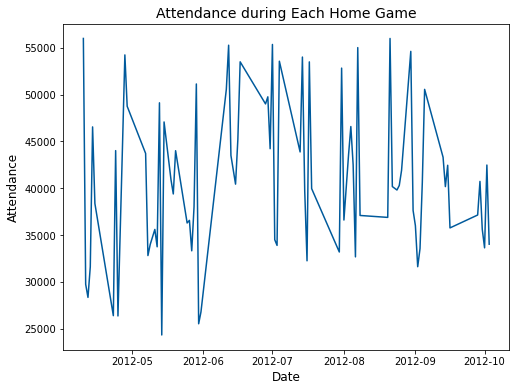

In [6]:
#A line graph of our attendance. It is difficult to discern because of gaps for travelling and away games. Not the best
#graph to make but we can learn from it


plt.figure(figsize=(8,6))
plt.plot(dodgers.Date, dodgers.attend, color='#005A9C')
plt.title('Attendance during Each Home Game', size=14)
plt.xlabel('Date', size=12), plt.ylabel('Attendance', size=12)
plt.show()

# Here is a different look:
![Photo](dodgerheat.png)

In [7]:
#Grouping by day

byday = dodgers.groupby(['day_of_week']).mean()
byday = byday.reindex(['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday'])

<Figure size 576x432 with 0 Axes>

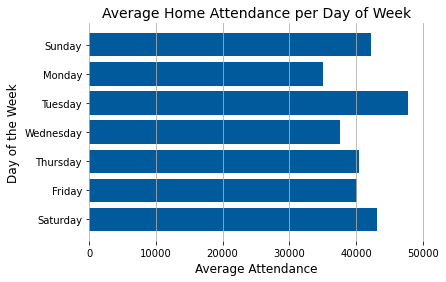

In [8]:
#Graohing days of the week attendance numbers.

plt.figure(figsize=(8,6), frameon=False)
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.barh(byday.index, byday.attend, color='#005A9C')
plt.grid(axis='x')
plt.title('Average Home Attendance per Day of Week', fontsize=14)
plt.xlabel('Average Attendance', fontsize=12), plt.ylabel('Day of the Week', fontsize=12)
plt.show()

In [9]:
#Lets look at data from the promotions that happened.

caps = dodgers[dodgers.cap == 'YES']
caps['promo_type'] = 'cap'
shirts = dodgers[dodgers.shirt == 'YES']
shirts['promo_type'] = 'shirt'
fireworks = dodgers[dodgers.fireworks == 'YES']
fireworks['promo_type'] = 'fireworks'
bobblehead = dodgers[dodgers.bobblehead == 'YES']
bobblehead['promo_type'] = 'bobblehead'

In [10]:
#Here are average attendance numbers from those days. Our cap days performed worse than any other game, but all the 
#Others performed well. Bobblehead especially

print('The average attendance throughout the season was: ' + str(dodgers.attend.mean()))
print('Average attendance on caps days is: ' + str(caps.attend.mean()))
print('Average attendance on shirts days is: ' + str(shirts.attend.mean()))
print('Average attendance on fireworks days is: ' + str(fireworks.attend.mean()))
print('Average attendance on bobblehead days is: ' + str(bobblehead.attend.mean()))

The average attendance throughout the season was: 41040.07407407407
Average attendance on caps days is: 38189.5
Average attendance on shirts days is: 46643.666666666664
Average attendance on fireworks days is: 41077.857142857145
Average attendance on bobblehead days is: 53144.63636363636


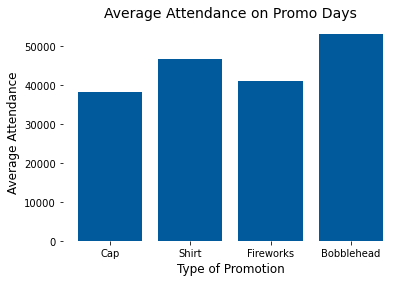

In [11]:
#Lets see how each of these promo days compare. Bobblehead days far exceed the other promotions. So we should remcommend
#The sponsor use bobbleheads so we can get more people attending.

info = {'promo_type':['Cap', 'Shirt', 'Fireworks', 'Bobblehead'], 'average_attendance':[38189.5, 46643.6666, 41077.85714, 53144.636363]}
promo_type = pd.DataFrame(info)

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.bar(promo_type.promo_type, promo_type.average_attendance, color='#005A9C')
plt.title('Average Attendance on Promo Days', fontsize=14)
plt.xlabel('Type of Promotion', fontsize=12), plt.ylabel('Average Attendance', fontsize=12)
plt.show()

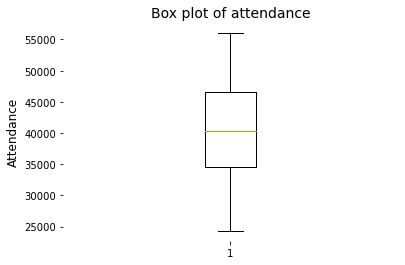

In [12]:
#Let's look how attendance is distributed. We don't want to have a giveaway on high attendance days, we want to 
#entice people to go on days that won't have a ton of people.


fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.boxplot(dodgers.attend)
plt.title('Box plot of attendance', fontsize=14)
plt.ylabel('Attendance', fontsize=12)
plt.show()

In [13]:
#Lets look at how weather plays a role. As expected clear weather has higher attendance, although temperature is 
#different. We will look at that too.

clear = dodgers[dodgers.skies=='Clear ']
cloudy = dodgers[dodgers.skies=='Cloudy']

print('Clear weather average attendance: ' + str(clear.attend.mean()))
print('Cloudy weather average attendance: ' + str(cloudy.attend.mean()))

Clear weather average attendance: 41729.209677419356
Cloudy weather average attendance: 38791.31578947369


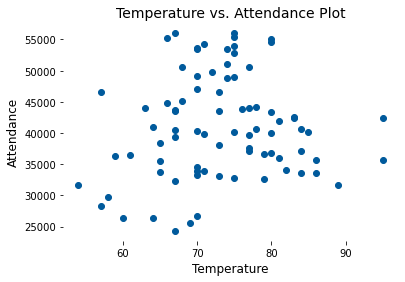

In [14]:
#From here we can see how the sweet spot is between 70-80 degrees. Once it gets hotter than 80, we see the numbers 
#start to dip again, and numbers are really bad once we approach 100 degrees and dip lower than 60.

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.scatter(dodgers.temp, dodgers.attend, color='#005A9C')
plt.title('Temperature vs. Attendance Plot', fontsize=14)
plt.xlabel('Temperature', fontsize=12), plt.ylabel('Attendance', fontsize=12)
plt.show()

In [15]:
#So far we have looked at the days we want to increase attendance, and some of the factors that will help with that. 
#Now lets look at possibilities of days from what we have been working on.


#Let's get rid of days we already have promos. We shouldn't have two on the same day

possibilities = dodgers[dodgers.cap == 'NO']
possibilities = possibilities[possibilities.shirt == 'NO']
possibilities = possibilities[possibilities.bobblehead == 'NO']
possibilities = possibilities[possibilities.fireworks == 'NO']


#Let's also reduce the days to days of the week we are lacking attendance. So we want to focus on Mondays, Wednesdays,
#Thursdays and Fridays

days = ['Monday', 'Wednesday', 'Thursday', 'Friday']
possibilities = possibilities.loc[possibilities['day_of_week'].isin(days)]

#Ideally we want to focus on days where attendance is below our median. Lets try it

possibilities = possibilities[possibilities.attend < dodgers.attend.median()]

#We also want a clear sky day. Let's make sure it'll be clear so we don't have to cancel

possibilities = possibilities[possibilities.skies == 'Clear ']

#We also want that sweet spot betwen 70 and 80 degrees

possibilities = possibilities[possibilities.temp > 69]
possibilities = possibilities[possibilities.temp < 81]

In [16]:
#Here are the possible days narrowed down. We currently have no promotions, and perfect conditions. These are on days
#That are underperforming, hence the lower attendance numbers, but all of the conditions (temperature and skies) are perfect.


possibilities

,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,Date
14,33993,Wednesday,Giants,71,Clear,Night,NO,NO,NO,NO,2012-05-09
26,38016,Monday,Brewers,73,Clear,Night,NO,NO,NO,NO,2012-05-28
29,26773,Thursday,Brewers,70,Clear,Night,NO,NO,NO,NO,2012-05-31
40,34493,Monday,Reds,70,Clear,Night,NO,NO,NO,NO,2012-07-02
49,33180,Monday,Snakes,73,Clear,Night,NO,NO,NO,NO,2012-07-30
51,36596,Wednesday,Snakes,79,Clear,Day,NO,NO,NO,NO,2012-08-01
55,32659,Monday,Rockies,79,Clear,Night,NO,NO,NO,NO,2012-08-06
58,36878,Monday,Giants,80,Clear,Night,NO,NO,NO,NO,2012-08-20
60,40173,Wednesday,Giants,75,Clear,Night,NO,NO,NO,NO,2012-08-22


**My suggestion:** Because we have a couple days to choose from, we need to find a date to plan it now. My suggestion for the good of both the Dodgers and the sponsor would be to try to shoot for 5/31/2012, on Thursday night against the Brewers. Because this is by far the lowest day in our group, there is a lot of space to grow. This date has a lot going for it, and there should be no reason numbers are down, and could easily grow in numbers. I actually cannot pinpoint the reason this game has such low attendance, but lets look at why this game should easily jump in numbers with a bobblehead giveaway.
For one, the Dodgers entered this game with a record of 32-18, and the Brewers with a record of 22-28, one game from a 4 game sweep of the Dodgers. It's been an overall successful season for the Dodgers and the Brewers are using (future Dodgers) Zack Greinke, who should be drawing in views. More thing that don't add up, this is the only Thursday night game on the list, and all other Thursdays performed significantly better. We also have perfect conditions with 70 degree weather and clear skies. Overall, this game should have a higher turnout than it did, and by targetting this game, we should see much better numbers if we offer a promotion on this day